In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")


<IPython.core.display.Javascript object>


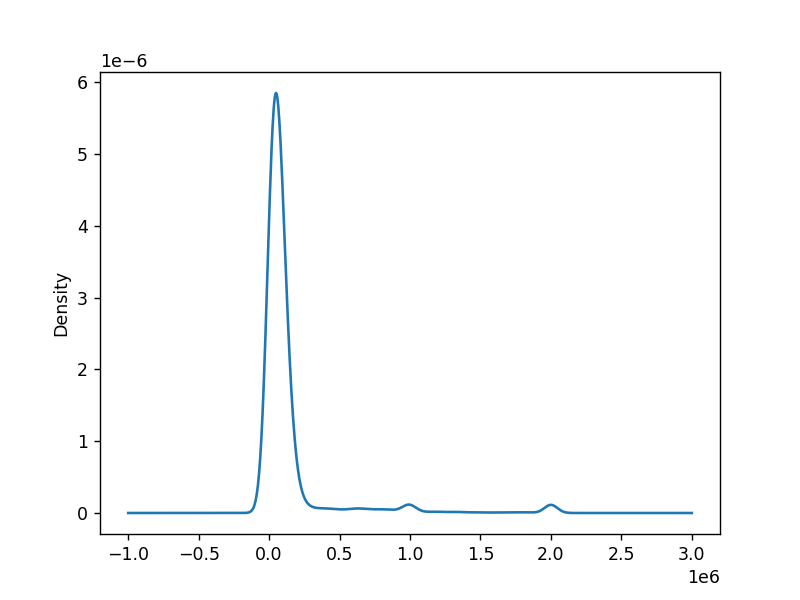

This distribution has skew 4.69365595683121
This distribution has kurtosis 23.628925684769143


In [18]:
#The column ConvertedComp contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

#This assumes 12 working months and 50 working weeks.

#Plot the distribution curve for the column ConvertedComp
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df_ob=df['ConvertedComp']
df_ob.plot(kind = 'density')
print('This distribution has skew',df_ob.skew())
print('This distribution has kurtosis', df_ob.kurt())

<IPython.core.display.Javascript object>


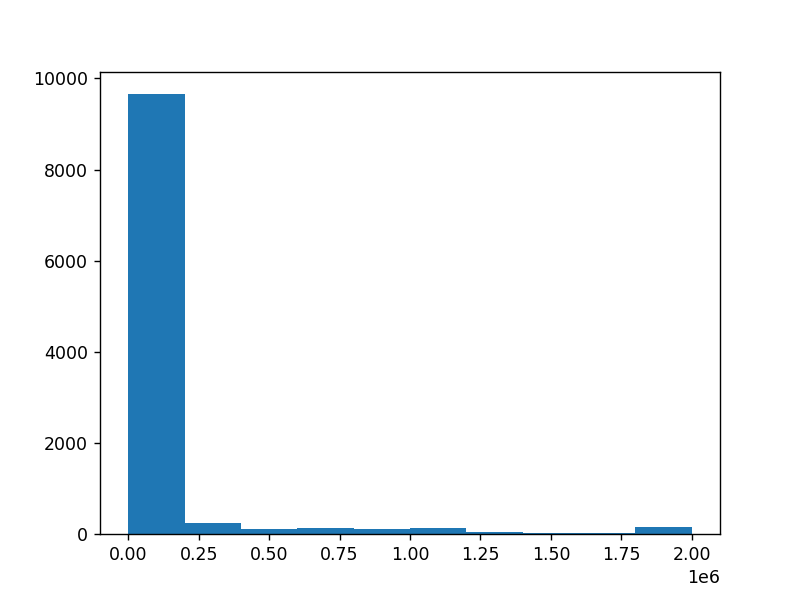

(array([9659.,  238.,  115.,  125.,   99.,  131.,   34.,   15.,   15.,
         151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

In [10]:
#The histogram for the column ConvertedComp
%matplotlib notebook
import matplotlib.pyplot as plt1
data = df['ConvertedComp']

plt1.hist(data)

In [12]:
#The Median of the column ConvertedComp
df['ConvertedComp'].median()

57745.0

In [13]:
#How many responders identified themselves only as a Man?
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [14]:
#the median ConvertedComp of responders identified themselves only as a Woman
woman=df.loc[df['Gender'] == 'Woman']
woman['ConvertedComp'].median()

57708.0

In [15]:
#five number summary for the column Age
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

<IPython.core.display.Javascript object>


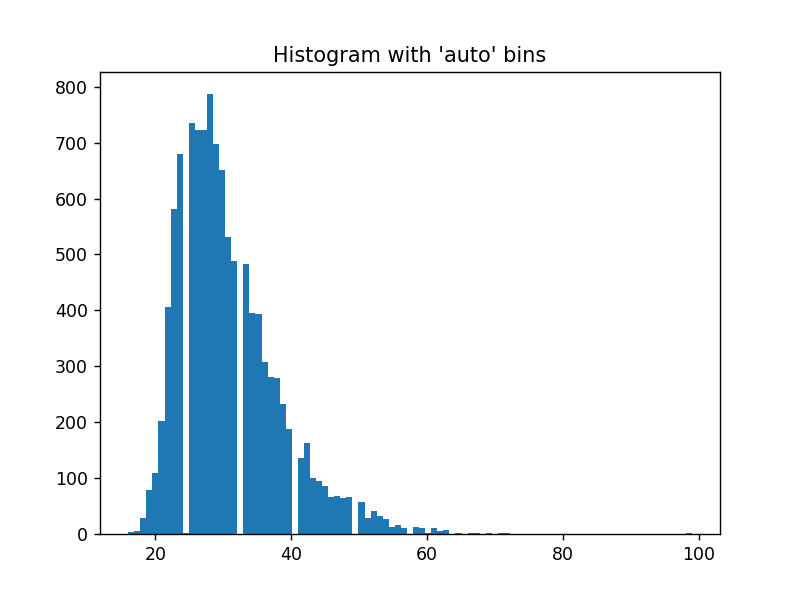

In [17]:
#The histogram of the column Age
%matplotlib notebook
a = np.hstack((df['Age']))
_ = plt.hist(a, bins='auto')  
plt.title("Histogram with 'auto' bins")

plt.show()

<IPython.core.display.Javascript object>


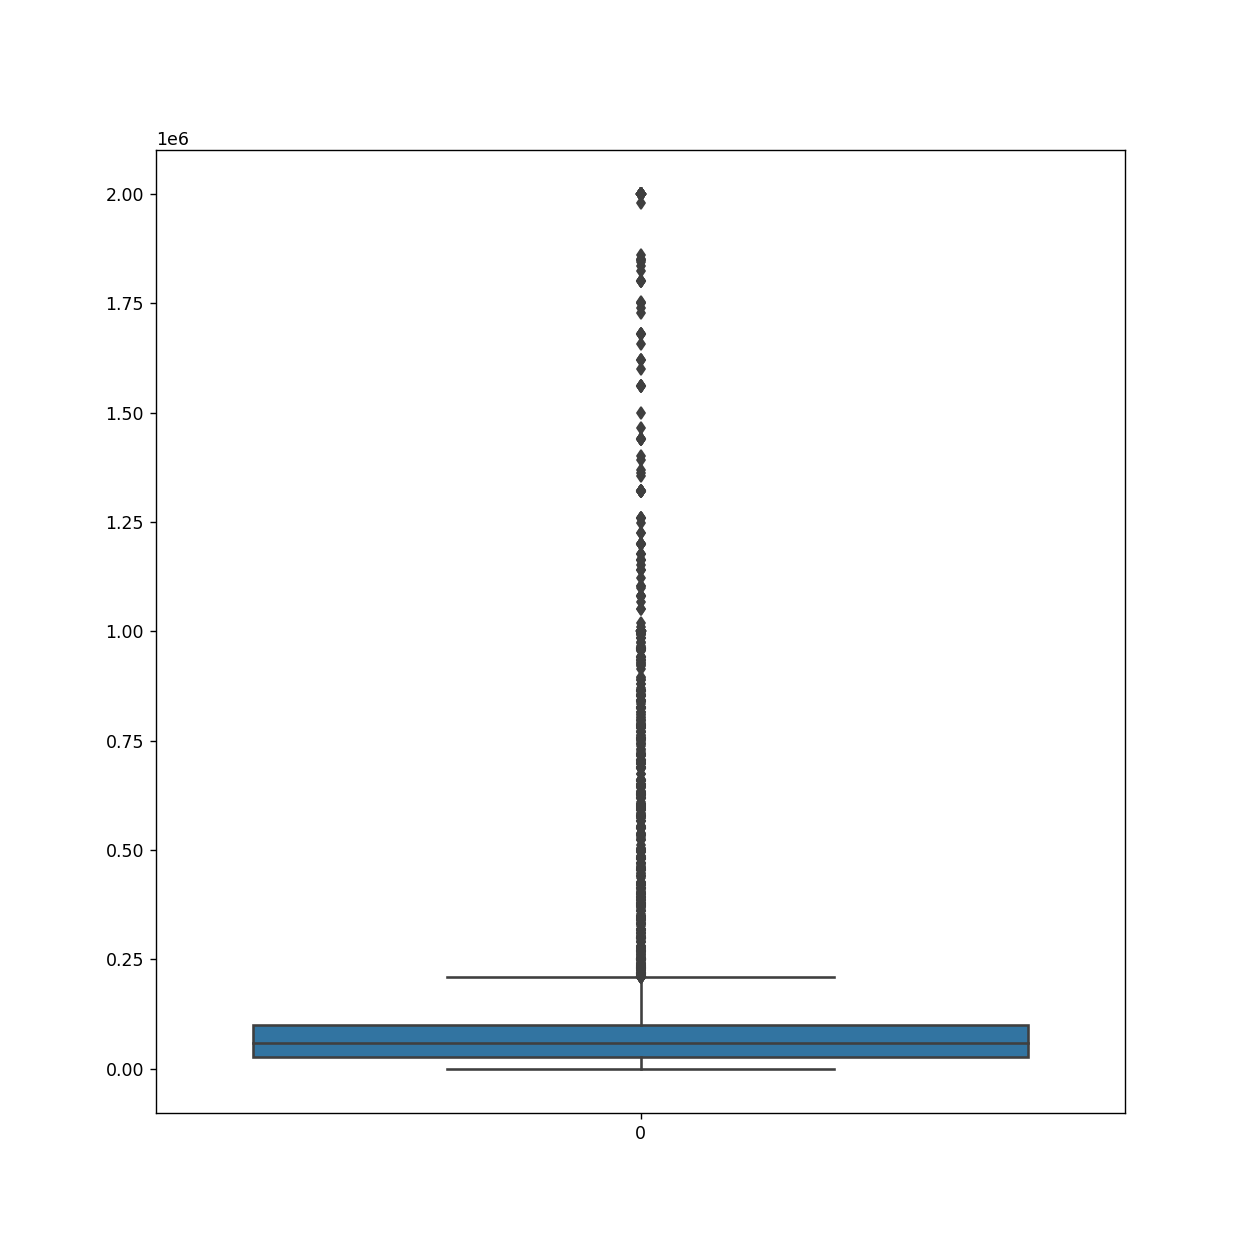

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [20]:
 #The outliers in the column ConvertedComp using a box plot
con = df['ConvertedComp']
plt.figure(figsize=(10,10))
#import seaborn as sns
sns.boxplot(data=con)
con.describe()      

In [21]:
#Inter Quartile Range 
q3 = df['ConvertedComp'].quantile(.75)
q1 = df['ConvertedComp'].quantile(.25)
iqr=q3-q1
print("q1=",q1,"   ","q3=",q3,"   ","iqr=",iqr)

q1= 26868.0     q3= 100000.0     iqr= 73132.0


In [23]:
#the upper and lower bounds
upper=q3+1.5*iqr
lower=q3-1.5*iqr
print("upper:", upper,"------", "lower:", lower)

upper: 209698.0 ------ lower: -9698.0


In [24]:
#Identify how many outliers are there in the ConvertedComp column.
lower_df=(df['ConvertedComp']<lower)
upper_df=(df['ConvertedComp']>upper)
df['ConvertedComp'][(lower_df|upper_df)]

3         455352.0
13       1100000.0
45        229016.0
46       2000000.0
60       1000000.0
           ...    
11296     840000.0
11303    1000000.0
11350     300000.0
11353     260000.0
11369     701196.0
Name: ConvertedComp, Length: 879, dtype: float64

In [25]:
#Create a new dataframe by removing the outliers from the ConvertedComp column
outliers=df['ConvertedComp'][(~lower_df|upper_df)].value_counts()
print(outliers)

2000000.0    138
1000000.0    105
100000.0      99
150000.0      92
120000.0      86
            ... 
53148.0        1
256000.0       1
54423.0        1
392.0          1
41280.0        1
Name: ConvertedComp, Length: 3515, dtype: int64


In [26]:
#Find the correlation between Age and all other numerical columns.
print(df.groupby("Age").corr())

                    Respondent  CompTotal  ConvertedComp  WorkWeekHrs  \
Age                                                                     
16.0 Respondent       1.000000   0.999651       0.969218     0.228211   
     CompTotal        0.999651   1.000000       0.975381     0.253837   
     ConvertedComp    0.969218   0.975381       1.000000     0.460892   
     WorkWeekHrs      0.228211   0.253837       0.460892     1.000000   
     CodeRevHrs      -0.228211  -0.253837      -0.460892    -1.000000   
...                        ...        ...            ...          ...   
99.0 Respondent            NaN        NaN            NaN          NaN   
     CompTotal             NaN        NaN            NaN          NaN   
     ConvertedComp         NaN        NaN            NaN          NaN   
     WorkWeekHrs           NaN        NaN            NaN          NaN   
     CodeRevHrs            NaN        NaN            NaN          NaN   

                    CodeRevHrs  
Age              